In [4]:
train_file = '/Users/dzzxjl/data/MNIST_kaggle/train.csv'
test_file = '/Users/dzzxjl/data/MNIST_kaggle/test.csv'


In [2]:
import numpy as np # linear algebra
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [3]:
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler

Using TensorFlow backend.


In [5]:
raw_data = np.loadtxt(train_file, skiprows=1, dtype='int', delimiter=',')
x_train, x_val, y_train, y_val = train_test_split(raw_data[:, 1:], raw_data[:, 0], test_size=0.1)

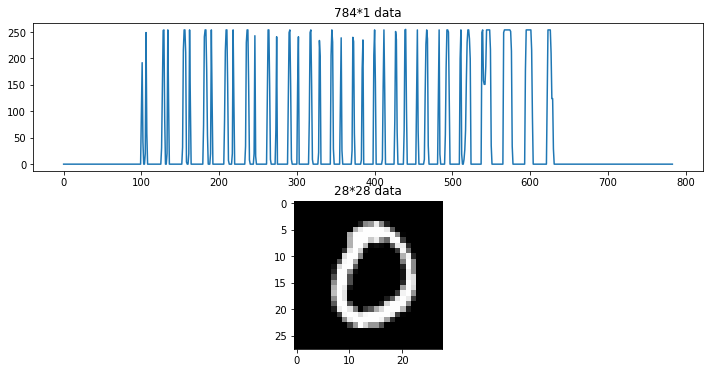

In [12]:
fig, ax = plt.subplots(2, 1, figsize=(12, 6))
ax[0].plot(x_train[1])
ax[0].set_title('784*1 data')
ax[1].imshow(x_train[3].reshape(28,28), cmap='gray')
ax[1].set_title('28*28 data')

In [13]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_val = x_val.reshape(-1, 28, 28, 1)

In [14]:
x_train = x_train.astype("float32")/255
x_val = x_val.astype("float32")/255


In [17]:
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_train[0]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.])

In [18]:
model = Sequential()

In [19]:
model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))

model.add(BatchNormalization())
model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(strides=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation='relu'))
model.add(BatchNormalization())
#model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation='relu'))
#model.add(BatchNormalization())
model.add(MaxPool2D(strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [20]:
datagen = ImageDataGenerator(zoom_range = 0.1,
                            height_shift_range = 0.1,
                            width_shift_range = 0.1,
                            rotation_range = 10)

In [21]:
model.compile(loss='categorical_crossentropy', optimizer = Adam(lr=1e-4), metrics=["accuracy"])

In [22]:
annealer = LearningRateScheduler(lambda x: 1e-3 * 0.9 ** x)

In [23]:
hist = model.fit_generator(datagen.flow(x_train, y_train, batch_size=16),
                           steps_per_epoch=500,
                           epochs=20, #Increase this when not on Kaggle kernel
                           verbose=2,  #1 for ETA, 0 for silent
                           validation_data=(x_val[:400,:], y_val[:400,:]), #For speed
                           callbacks=[annealer])

Epoch 1/20
27s - loss: 0.9242 - acc: 0.7033 - val_loss: 0.4095 - val_acc: 0.8775
Epoch 2/20
29s - loss: 0.3650 - acc: 0.8876 - val_loss: 0.1623 - val_acc: 0.9550
Epoch 3/20
26s - loss: 0.2823 - acc: 0.9157 - val_loss: 0.0929 - val_acc: 0.9725
Epoch 4/20
26s - loss: 0.2371 - acc: 0.9293 - val_loss: 0.0707 - val_acc: 0.9775
Epoch 5/20
26s - loss: 0.2081 - acc: 0.9367 - val_loss: 0.0970 - val_acc: 0.9725
Epoch 6/20
26s - loss: 0.1983 - acc: 0.9432 - val_loss: 0.0662 - val_acc: 0.9775
Epoch 7/20
28s - loss: 0.1679 - acc: 0.9514 - val_loss: 0.0794 - val_acc: 0.9750
Epoch 8/20
29s - loss: 0.1350 - acc: 0.9580 - val_loss: 0.0425 - val_acc: 0.9850
Epoch 9/20
29s - loss: 0.1435 - acc: 0.9595 - val_loss: 0.0612 - val_acc: 0.9800
Epoch 10/20
30s - loss: 0.1286 - acc: 0.9609 - val_loss: 0.0572 - val_acc: 0.9825
Epoch 11/20
31s - loss: 0.1271 - acc: 0.9617 - val_loss: 0.0394 - val_acc: 0.9875
Epoch 12/20
31s - loss: 0.1101 - acc: 0.9679 - val_loss: 0.0395 - val_acc: 0.9875
Epoch 13/20
26s - loss: 0

In [24]:
final_loss, final_acc = model.evaluate(x_val, y_val, verbose=0)
print("Final loss: {0:.4f}, final accuracy: {1:.4f}".format(final_loss, final_acc))

Final loss: 0.0307, final accuracy: 0.9890


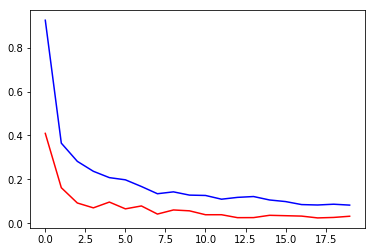

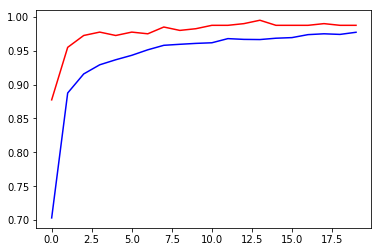

In [25]:
plt.plot(hist.history['loss'], color='b')
plt.plot(hist.history['val_loss'], color='r')
plt.show()
plt.plot(hist.history['acc'], color='b')
plt.plot(hist.history['val_acc'], color='r')
plt.show()

In [26]:
y_hat = model.predict(x_val)
y_pred = np.argmax(y_hat, axis=1)
y_true = np.argmax(y_val, axis=1)
cm = confusion_matrix(y_true, y_pred)
print(cm)

[[397   0   0   0   1   0   4   0   1   0]
 [  0 489   1   1   0   0   0   1   0   1]
 [  0   0 408   1   0   1   0   1   0   0]
 [  0   0   1 457   0   1   0   0   0   1]
 [  0   1   0   0 399   0   0   0   0   3]
 [  0   0   0   1   0 400   3   0   1   1]
 [  0   0   0   0   0   1 372   0   1   0]
 [  0   0   5   0   0   0   0 442   0   0]
 [  0   0   0   0   2   0   0   0 371   6]
 [  1   0   0   0   3   0   0   1   0 419]]


In [27]:
mnist_testset = np.loadtxt(test_file, skiprows=1, dtype='int', delimiter=',')
x_test = mnist_testset.astype("float32")
x_test = x_test.reshape(-1, 28, 28, 1)/255.
y_hat = model.predict(x_test, batch_size=64)

output_file = "submission.csv"
with open(output_file, 'w') as f :
    f.write('ImageId,Label\n')
    for i in range(len(y_pred)) :
        f.write("".join([str(i+1),',',str(y_pred[i]),'\n']))